## Preliminary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv("data_master2.csv")
data.head()

,Gap,Reaction Time,undergraduate gpa,Exp avg,Sop avg,GPA avg,LoR avg,distance to campus,length,Response-letter sent,...,dposit received,follow up,1411,272,1632,1645,master or not,1st gen,residency,response
0,0.000000,1.281658,0.000000,0.789351,0.967457,1.047935,1.210126,0.042364,0.920615,0.681886,...,0,0,0,0,0,0,0,0,1,0
1,1.160673,1.222046,0.000000,1.262962,0.846525,1.047935,0.672292,0.037201,0.920615,0.762108,...,1,0,0,0,0,0,0,0,1,1
2,0.000000,0.238448,0.402624,0.000000,0.000000,0.000000,0.000000,0.084369,0.920615,0.681886,...,1,0,0,0,0,0,0,0,1,0
3,16.997967,2.503705,0.680190,1.578703,0.725593,0.261984,0.806751,0.033190,1.380922,0.200555,...,1,0,0,0,0,0,0,0,1,1
4,0.875911,0.923986,0.686290,1.105092,0.967457,0.261984,0.806751,0.793829,1.380922,0.000000,...,1,0,1,0,0,0,0,0,1,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5091 entries, 0 to 5090
Data columns (total 29 columns):
Gap                     5091 non-null float64
Reaction Time           5091 non-null float64
undergraduate gpa       5091 non-null float64
Exp avg                 5091 non-null float64
Sop avg                 5091 non-null float64
GPA avg                 5091 non-null float64
LoR avg                 5091 non-null float64
distance to campus      5091 non-null float64
length                  5091 non-null float64
Response-letter sent    5091 non-null float64
last 60/90 gpa          5091 non-null float64
decision 1              5091 non-null int64
decision 2              5091 non-null int64
academic con            5091 non-null int64
campus1                 5091 non-null int64
campus2                 5091 non-null int64
campus3                 5091 non-null int64
campus4                 5091 non-null int64
campus5                 5091 non-null int64
dposit received         5091 non-nu

In [29]:
data.describe()

,Gap,Reaction Time,undergraduate gpa,Exp avg,Sop avg,GPA avg,LoR avg,distance to campus,length,Response-letter sent,...,dposit received,follow up,1411,272,1632,1645,master or not,1st gen,residency,response
count,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,...,5091.000000,5091.000000,5091.000000,5091.000000,5091.0,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000
mean,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.694166,0.000589,0.029464,0.001768,0.0,0.000982,0.029071,0.510509,0.622864,0.592025
std,6.258178,0.678768,0.114475,0.357235,0.253189,0.290475,0.267889,1.873968,0.203576,1.454722,...,0.460805,0.024270,0.169119,0.042012,0.0,0.031327,0.168022,0.499939,0.484717,0.491507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.082905,0.596120,0.924204,0.631481,0.846525,0.785951,0.806751,0.025895,0.920615,0.200555,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.291970,0.894180,1.003509,0.947222,0.967457,1.047935,1.075668,0.066217,0.920615,0.481331,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1.091585,1.192240,1.082814,1.262962,1.209321,1.309919,1.210126,0.762470,0.920615,1.082995,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000
max,431.570789,7.838980,1.220072,1.578703,1.693050,1.309919,1.344584,18.911538,1.841230,18.410918,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
X = data.loc[:,'Gap':'residency']
y = data.loc[:,'response']

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
logreg = LogisticRegression()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [37]:
print("Training features/target:", X_train.shape, y_train.shape)
print("Testing features/target:", X_test.shape, y_test.shape)

Training features/target: (3054, 28) (3054,)
Testing features/target: (2037, 28) (2037,)


In [38]:
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

0.94368041912246237

In [39]:
y_pred = logreg.predict(X_test)

In [40]:
from sklearn.metrics import roc_curve

In [41]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

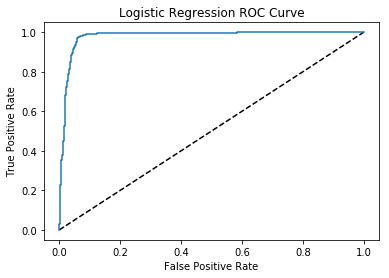

In [43]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()           

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 772,   77],
       [  12, 1176]])

In [47]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,772,77,849
1,12,1176,1188
All,784,1253,2037


## Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.95778105056455576

In [70]:
y_pred2 = rf.predict(X_test)

In [71]:
pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,791,58,849
1,28,1160,1188
All,819,1218,2037


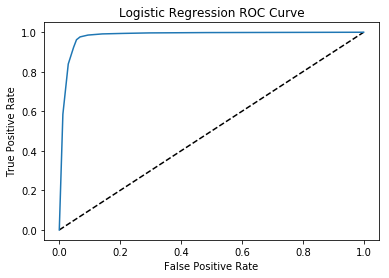

In [72]:
y_pred_prob2 = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()   


## Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=7, random_state=0)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.9464899361806578

In [74]:
y_pred3 = tree.predict(X_test)

In [75]:
pd.crosstab(y_test, y_pred3, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,762,87,849
1,22,1166,1188
All,784,1253,2037


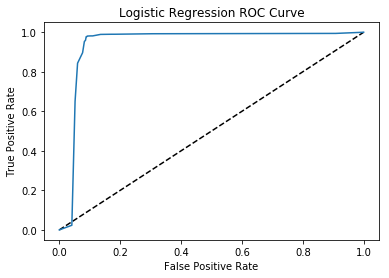

In [76]:
y_pred_prob3 = tree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()  

## Boosted Tree

In [77]:
from sklearn.ensemble import AdaBoostClassifier

In [78]:
boost = AdaBoostClassifier()
boost.fit(X_train, y_train)
boost.score(X_test, y_test)

0.95041728031418748

In [79]:
y_pred4 = boost.predict(X_test)

In [80]:
pd.crosstab(y_test, y_pred4, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,778,71,849
1,30,1158,1188
All,808,1229,2037


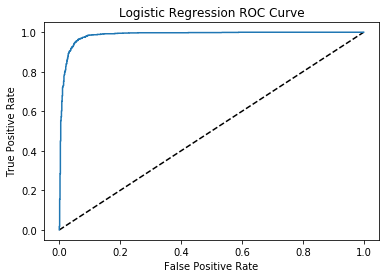

In [81]:
y_pred_prob4 = boost.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show() 

## Feature Importances

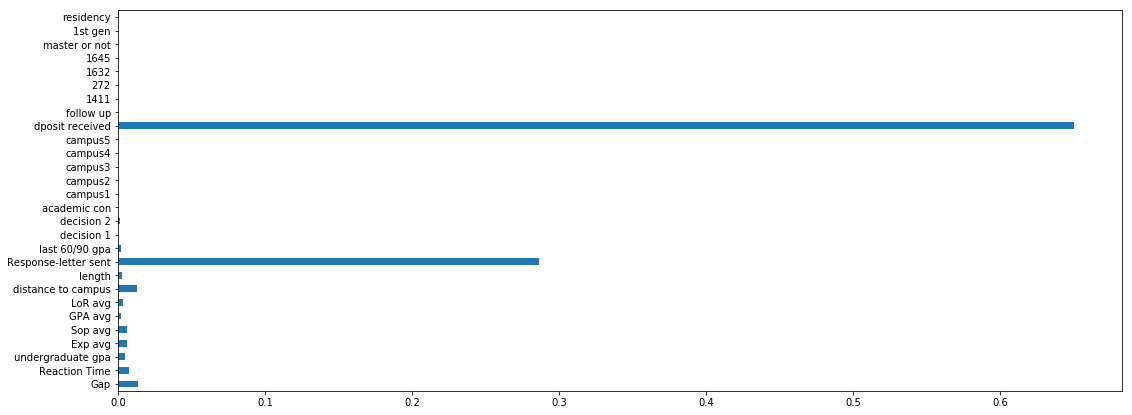

In [51]:
%matplotlib inline
pd.Series(tree.feature_importances_, index=X.columns).plot.barh(figsize=(18,7));

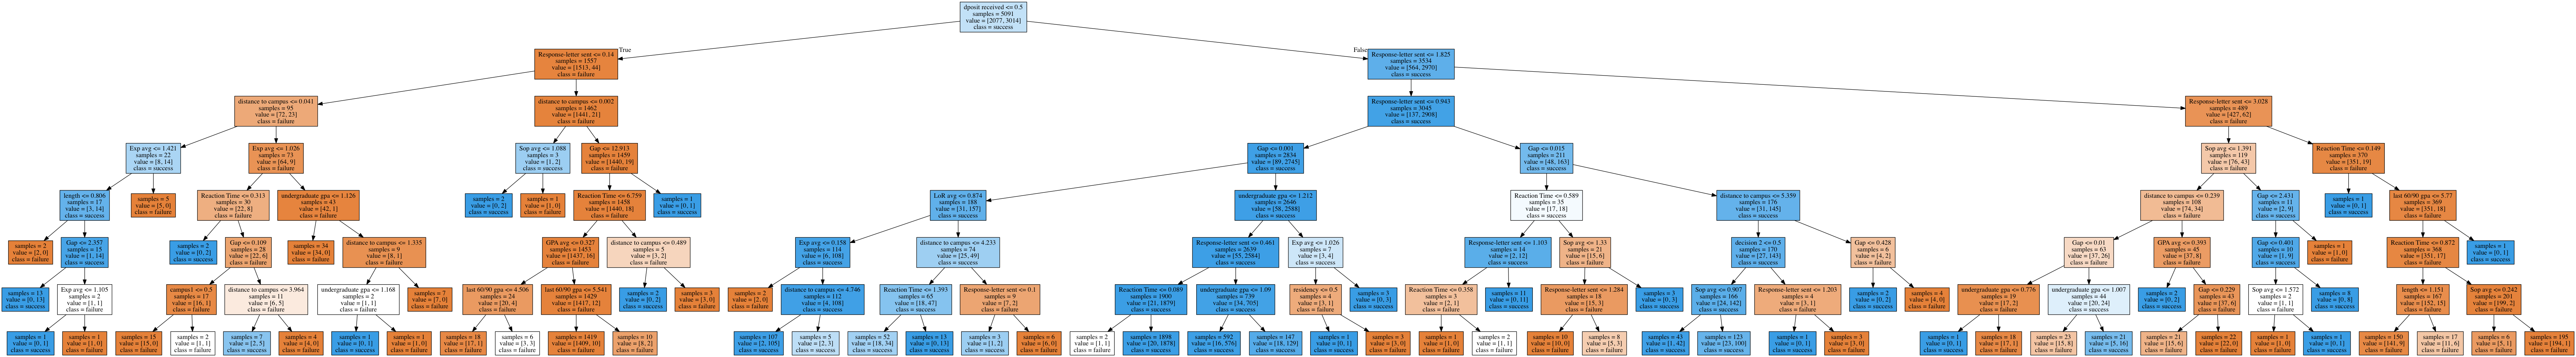

In [52]:
from sklearn.tree import export_graphviz
import sys, subprocess
from IPython.display import Image

export_graphviz(tree, feature_names=X.columns, class_names=['failure','success'],
                out_file='ml-good.dot', impurity=False, filled=True)
subprocess.check_call([sys.prefix+'/bin/dot','-Tpng','ml-good.dot',
                       '-o','ml-good.png'])
Image('ml-good.png')